# 1. Simulations (50pt)
## 1. (2pt) load data college-admissions.csv. You only need variables Research and Chance to Admit. You are welcome to delete all other variables right here. Perform basic description of data: what is the number of observations? Are there any missings or otherwise invalid entries?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
admissions = pd.read_csv("../data/college-admissions.csv.bz2")
admissions.columns = admissions.columns.str.replace(' ', '_')
admissions = admissions[['Research', 'Chance_of_Admit_']]
print(admissions.shape)
print(admissions.isnull().sum())
admissions.head()

(400, 2)
Research            0
Chance_of_Admit_    0
dtype: int64


,Research,Chance_of_Admit_
0,1,0.92
1,1,0.76
2,1,0.72
3,1,0.80
4,0,0.65


There are a total of 400 rows and 2 columns (after filtering the columns down). There also seems to be no null values.

## 2. (3pt) Describe the admission probability: compute its mean, median, standard deviation, and range. According to these figures, which students are more likely to be admitted–researchers or non-researchers?

In [4]:
admissions.groupby(admissions.Research).mean()

,Chance_of_Admit_
Research,
0,0.637680
1,0.795982


In [5]:
admissions.groupby(admissions.Research).median()

,Chance_of_Admit_
Research,
0,0.65
1,0.80


In [6]:
admissions.groupby(admissions.Research).std()

,Chance_of_Admit_
Research,
0,0.113784
1,0.123051


In [213]:
admissions.groupby(admissions.Research).max() - admissions.groupby(admissions.Research).min()

,Chance_of_Admit_
Research,
0,0.55
1,0.61


By looking at the mean, median, and std, it seems like students who researched were more likely to be admitted. Looking at the range, it seems to be that there is a little more spread for the people who did research than those who did not.

## 3. (3pt) Below, we are going to do t-test. However, t-test works best if the data is normally distributed. Analyze the shape of the distributions for both researchers and non-researchers on a histogram. Comment its shape. Do you think the chances are normally distributed?

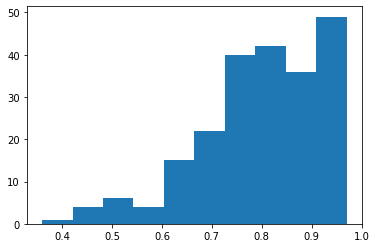

In [13]:
research = admissions[admissions.Research == 1]
_ = plt.hist(research["Chance_of_Admit_"])

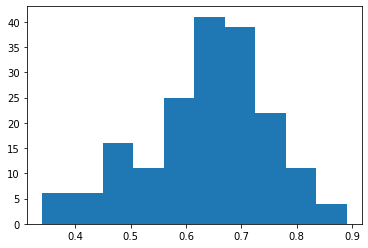

In [14]:
non_research = admissions[admissions.Research == 0]
_ = plt.hist(non_research["Chance_of_Admit_"])

I don't think chances are normally distributed. For students that had research activities, the graph was skewed left. For the students that had no research activities, it looks more normal, but it is still a little skewed left.

## 4. (5pt) Compute the mean difference in the admission rate between researchers and non- researchers.
### Hint: 0.158

In [56]:
mdiff = research["Chance_of_Admit_"].mean() - non_research["Chance_of_Admit_"].mean()
mdiff

0.1583021771487675

## 5. (2pt) Let’s state our H0 again: researchers and non-researchers have similar admission chances (in average). Hence we have to create fake researchers and fake non-researchers using the same distribution. The obvious choice for this is the distribution of all students combined. Compute the overall mean μ0 and standard deviation σ0 of admission chances across all students in the data.
### Hint: standard deviation is 0.143.

In [136]:
mu = np.mean(admissions["Chance_of_Admit_"])
sigma = np.std(admissions["Chance_of_Admit_"])
count = admissions.Research.value_counts()
mu, sigma

(0.7243499999999996, 0.1424309569580995)

## 6. (5pt) Now create two sets of random normals, “fake researchers” and “fake non-researchers”, both with the same mean μ0 and standard deviation σ0 that you just computed above. The number of fake students must be the same as the number of real students for the corresponding group. What is the difference in the mean admission chances of the fake researchers and fake non- researchers? Compare the result with the real difference you found above. Now compare this number with what you see in data.

In [67]:
aR = np.random.normal(mu, sigma, size=count[1]) #students who did research
aNR = np.random.normal(mu, sigma, size=count[0]) #students who did not do research

In [72]:
fake_diff = np.mean(aR) - np.mean(aNR)
fake_diff

0.0023942505011348425

From my fake simulations, I am getting a difference of .002, which is close to 0. The real difference is about 0.158, which is a lot more than 0.002. In the real data, a difference of 0.002 means that there should be little-to-no difference between the admission rates. However, that is not the case.

## (3pt) Why do we use the same mean μ0 for both fake researchers and fake non-researchers?

We use the same mean because $H0$: There is no difference in admission rates between researchers and non-researchers. So, in order to test that theory, we must use the same $\mu0$ for both fake researchers and real researchers.

## 8. (5pt) Now repeat the previous question a large number R (1000 or more) times. Each time store the mean difference between fake researchers and fake non-researchers, so you end up with R different values for the mean difference.

In [115]:
R = 1000
np.random.seed(2)
aR = np.random.normal(mu, sigma, size=(R, count[1])) #students who did research
aNR = np.random.normal(mu, sigma, size=(R, count[0])) #students who did not do research

## 9. (5pt) What is the mean of the mean differences? If you did your simulations correctly, it should be close to 0. Explain why do you get this result.

In [116]:
fake_diff = np.mean(aR) - np.mean(aNR)
fake_diff

0.000730888489867465

The result I received was .0007, which is close to 0. By the CLT, the more samples we have, the closer the mean will be to the expected value, and the more normally distributed it is. $H0$: diff = 0. In this case, the expected value is 0, so it makes sense that with R=1000, the mean differences would be close to 0.

## 10. (4pt) What is the largest mean difference (in absolute value) in your sample? Hint: np.abs computes absolute value.

In [117]:
meanR = aR.mean(axis=1)
meanNR = aNR.mean(axis=1)
mean_diff = meanR-meanNR
np.abs(mean_diff).max()

0.04828290992772655

## 11. (7pt) find 95% confidence interval (CI) of your sample of mean differences based on sample quantiles. Does the difference in actual data, 0.158 in favor of researchers, fall into the CI?

In [118]:
np.percentile(mean_diff, [2.5, 97.5])

array([-0.02641568,  0.02917017])

The difference in actual data does not fall into the CI.

## 12. (7pt) Finally, based on the simulations, what is your conclusion: is the observed difference 0.158 just a random fluke, or do students with research experience have better admission chances?

Since it is not in the CI, we can reject $H0$ at confidence range (95%). Since $H0$: there is no difference in admission rates between students who research and students who don't research, according to this figure, 0.158 is a rare/unlikely event. This means that it was just a random fluke.

# 2. Now repeat the above with t-test (40pt)

## 1. (10pt) Compute standard error SE of the nonresearchers-researchers mean difference. Remember: we are still working in logarithms!
### Hint: read OIS 7.3, p 267. You probably have to walk back and read about various other concepts the book is using in 7.3.

In [146]:
r1 = research['Chance_of_Admit_'].std()
r0 = non_research['Chance_of_Admit_'].std()
SE = np.sqrt(((r1)**2/count[1]) + ((r0)**2/count[0]))
SE

0.011860394139180394

## 2. (10pt) Compute 95% CI. Use the 5% two-tail significance level to look up tcr values in t-distribution table. OIS has such a table in Appendix C.2, and google image search finds a thousand similar tables. 95% CI is given by μ±tcr ·SE where μ is the mean, SE is its standard error, and tcr is the critical value from the table.
### Hint 1: what is the degrees of freedom in current case? Consult OIS 7.3.
### Hint 2: we need 2-tailed test as nonresearchers can have both better and worse admission chances than researchers.
### Hint 3: you can do this in two ways. Compute 95% CI around H0 value (i.e. difference is 0) and check if the actual difference fits in there (this is what we simulated above). Or compute 95% CI around the actual value, and check of H0 value 0 fits in there. DO NOT compute 95% around actual value and then check if the actual value fits in there. It always does!

In [195]:
tcrit = 1.973231 #df = 180
C1 = mdiff - tcrit*SE
C2 = mdiff + tcrit*SE
C1, C2 #Confidence Interval

(0.13489887976111842, 0.18170547453641656)

## 3. (6pt) What will you conclude based on CI: can you reject H0 that nonresearchers and re- searchers have equal admission chance at 5% level?

$H0$: the difference in admission rates is 0, and it is not in the confidence interval. Thus, we reject the $H0$ at 95%.

## 4, (8pt) Now perform the opposite operation: compute the t-value. When the you have mean μ and standard error SE, you can compute the t-value by

In [197]:
t = mdiff / SE
t

13.347126182410905

## 5. (6pt) What is the likelihood that such a t value happens just by random chance? Consult the t-table.
### Hint: I have never seen t-tables that contain such large values. But where on the table would you write this value? What can you say about how likely it is to see such a value just by random chance?

Because |t| > tcrit, this means that it is outside the confidence interval. Because it is outside the interval, the t value is an unlikely event and happened just by random chance.

# 3. Use canned t-test function (10pt)

## 1. (5pt) Compute t-value and the probability using ttest_ind.
### Note: you have to specify equal_var=False to tell the function that non-researchers and researchers chances may have different variance.

In [210]:
from scipy import stats
stats.ttest_ind(research['Chance_of_Admit_'], non_research['Chance_of_Admit_'], equal_var=False)

Ttest_indResult(statistic=13.347126182410907, pvalue=8.966853051858437e-34)

## 2. (5pt) Finally, state your conclusion: do researchers have better admission chances than non- researchers? Do all of your three methods: simulations, 95% CI, t-value and python’s t-test agree? 
### Hint: they should!

As seen above, the t-value I calculated and the t-value found using python's t-test agrees, meaning my t-test result is correct. In addition, python's t-test shows the p-value to be less than 0.05. When the p-value is less than the significance level (which is 0.05 in this case), then we reject $H0$. In all 3 tests, we rejected the $H0$. This means that there is a difference between in admission rates between those who do research and those who don't.